## __Homework_5__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# _Task 1_

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [2]:
import time

In [11]:
rand = np.random.rand(1000)
s_time = time.time()
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
csum = weight.cumsum()
v = rand*csum[-1]
s = csum[-2]
for i in range(len(weight)-1,-1,-1):
    m = (s<v)&(v<csum[i])
    if i != 0:
        s -= weight[i-1]
    v[m] = i
print("%s seconds" % (time.time() - s_time))

0.0013561248779296875 seconds


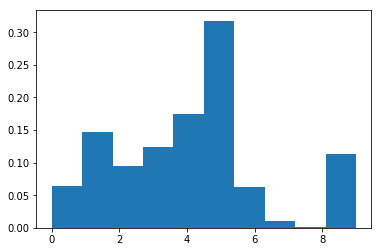

In [12]:
plt.hist(v,density=True)
plt.show()

In [35]:
np.sort(weight)
s_time = time.time()
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
csum = weight.cumsum()
v = rand*csum[-1]
s = csum[-2]
for i in range(len(weight)-1,-1,-1):
    m = (s<v)&(v<csum[i])
    if i != 0:
        s -= weight[i-1]
    v[m] = i
print("%s seconds" % (time.time() - s_time))

0.0007631778717041016 seconds


Время довольно сильно зависело от конкретного запуска. В среднем происходит незначительное улучшение.

# _Task 2_

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

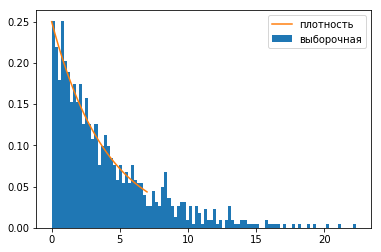

In [38]:
lambd=0.25
rand=np.random.rand(1000)
rand=-np.log(1-rand)/lambd
plt.hist(rand, bins=100, density=True, label='выборочная')
plt.plot(np.arange(700)/100,np.exp(-np.arange(700)*lambd/100)*lambd, label='плотность')
plt.legend()
plt.show()

# _Task 3_

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [17]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
a=np.empty(0, dtype=float)
s=0
while s<1000:
    x=(np.random.rand()-0.5)*8
    if(np.random.rand()*3.5<dist.pdf(x)):
        a = np.append(a, x) 
        s+=1


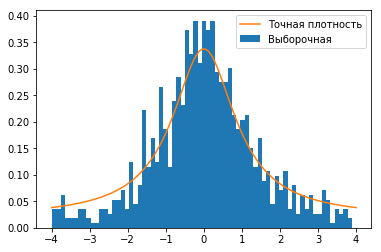

In [18]:
x = np.linspace(-4, 4, 100)
plt.hist(a, bins=70, density=True, label='Выборочная')
plt.plot(x, dist.pdf(x)+(2*np.arctan(-4)/3.1415926+1)/8, label='Точная плотность')
plt.legend()
plt.show()

# _Task 4_

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

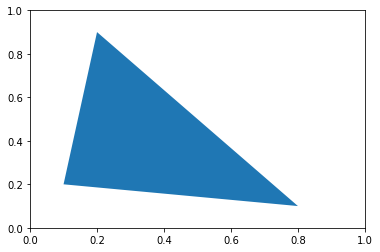

In [19]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

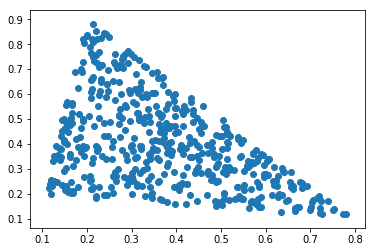

In [30]:
rand=np.random.rand(500,2)
s=rand.sum(axis=1)
m=s>1
np.place(rand[:,0], m, 1-rand[m][:,0])
np.place(rand[:,1], m, 1-rand[m][:,1])
A=np.array([7/np.sqrt(50),1/np.sqrt(50),-1/np.sqrt(50),7/np.sqrt(50)]).reshape(2,2)
rand=np.matmul(A,rand.T).T
rand=rand*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(rand[:,0],rand[:,1])
plt.show()

# _Task 5_

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

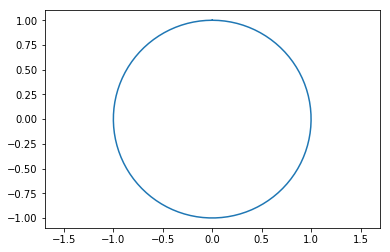

In [21]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

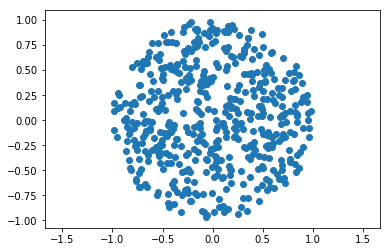

In [29]:
rand=np.random.rand(500,2)
x=np.sqrt(rand[:,1])*np.cos(2*np.pi*rand[:,0])
y=np.sqrt(rand[:,1])*np.sin(2*np.pi*rand[:,0])
plt.scatter(x,y)
plt.axis('equal')
plt.show()